In [ ]:
import matplotlib.pyplot as plt
from matplotlib.ticker import (AutoMinorLocator, MultipleLocator)

fig, ax = plt.subplots(figsize=(7,5), dpi=300)

# Set axis ranges; by default this will put major ticks every 25.
ax.set_xlim(0, 12)
ax.set_ylim(50, 100)

# Change major ticks to show every 20.
ax.xaxis.set_major_locator(MultipleLocator(2))
ax.yaxis.set_major_locator(MultipleLocator(10))

# Change minor ticks to show every 5. (20/4 = 5)
ax.xaxis.set_minor_locator(AutoMinorLocator(2))
ax.yaxis.set_minor_locator(AutoMinorLocator(2))

# Turn grid on for both major and minor ticks and style minor slightly
# differently.
ax.grid(which='major', color='#CCCCCC', linestyle='--', alpha=0.8, linewidth=0.5)
ax.grid(which='minor', color='#CCCCCC', linestyle=':', alpha=0.8, linewidth=0.5)

padding = 0.2
markersize = 14
fontsize = 16
linealpha = 0.5

# SampleCNN random
random = [2.40, 64.38]
ax.text(random[0] + padding, random[1] - 3, "Random CNN", fontsize=fontsize)
ax.plot([random[0], random[0]+0.2], [random[1], random[1] - 3.2], color='k', linestyle='-', linewidth=0.3, alpha=linealpha)
ax.plot([random[0] + padding, random[0] + 1], [random[1] - 3.2, random[1] - 3.2], color='k', linestyle='-', linewidth=0.3, alpha=linealpha)
ax.plot(random[0], random[1], ".", linewidth=2, markersize=markersize, color="gray")



# Dieleman
dieleman = [0.194, 85.58]
ax.text(dieleman[0] + padding, dieleman[1] - 3, "1D CNN", fontsize=fontsize)
ax.plot([dieleman[0], dieleman[0]+0.2], [dieleman[1], dieleman[1] - 3.2], color='k', linestyle='-', linewidth=0.3, alpha=linealpha)
ax.plot([dieleman[0] + padding, dieleman[0] + 1], [dieleman[1] - 3.2, dieleman[1] - 3.2], color='k', linestyle='-', linewidth=0.3, alpha=linealpha)
ax.plot(dieleman[0], dieleman[1], ".", linewidth=2, markersize=markersize, color="gray")



# SampleCNN
samplecnn = [2.40, 88.56]
ax.text(samplecnn[0] + 0.2, samplecnn[1] + 3.2, "SampleCNN", fontsize=fontsize)
ax.plot([samplecnn[0], samplecnn[0]+0.2], [samplecnn[1], samplecnn[1] + 3], color='k', linestyle='-', linewidth=0.3, alpha=linealpha)
ax.plot([samplecnn[0] + padding, samplecnn[0] + 1], [samplecnn[1] + 3, samplecnn[1] + 3], color='k', linestyle='-', linewidth=0.3, alpha=linealpha)
ax.plot(samplecnn[0], samplecnn[1], ".", linewidth=2, markersize=markersize, color="gray")


# ours
# CLMR
clmr = [2.5, 88.31]# 87.55788687]
ax.text(clmr[0] + padding, clmr[1] - 2, "CLMR", fontsize=fontsize)
ax.plot([clmr[0], clmr[0]+0.2], [clmr[1], clmr[1] - 2.2], color='k', linestyle='-', linewidth=0.3, alpha=linealpha)
ax.plot([clmr[0] + padding, clmr[0] + 1], [clmr[1] - 2.2, clmr[1] - 2.2], color='k', linestyle='-', linewidth=0.3, alpha=linealpha)
ax.plot(clmr[0], clmr[1], "*", linewidth=2, markersize=markersize+2, color="orange")


# CPC
cpc = [8.988672, 86.60]# 87.99]
ax.text(cpc[0] + padding, cpc[1] - 3, "CPC", fontsize=fontsize)
ax.plot([cpc[0], cpc[0] + 0.2], [cpc[1], cpc[1] - 3.2], color='k', linestyle='-', linewidth=0.3, alpha=linealpha)
ax.plot([cpc[0] + padding, cpc[0] + 1], [cpc[1] - 3.2, cpc[1] - 3.2], color='k', linestyle='-', linewidth=0.3, alpha=linealpha)
ax.plot(cpc[0], cpc[1], "*", linewidth=2, markersize=markersize+2, color="orange")


# Supervised (Pons et al.)
pons = [11.80, 89.05]
ax.text(pons[0] - 1.6, pons[1] + 2.2, "SOTA", fontsize=fontsize)
ax.plot([pons[0], pons[0] - padding], [pons[1], pons[1] + 2], color='k', linestyle='-', linewidth=0.3, alpha=linealpha)
ax.plot([pons[0] - padding, pons[0] - 1], [pons[1] + 2, pons[1] + 2], color='k', linestyle='-', linewidth=0.3, alpha=linealpha)
ax.plot(pons[0], pons[1], ".", linewidth=2, markersize=markersize, color="gray")



plt.xlabel("# Parameters (millions)")
plt.ylabel("ROC-AUC (%)")
plt.tight_layout()
plt.savefig("../media/roc_auc_magnatagatune.png")
plt.show()

# Ablation

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# transforms_polarity, transforms_noise, transforms_gain, transforms_filters, transforms_delay, transforms_pitch
data = [
    [0.3049333103, 0.3145877378, 0.3152903961, 0.311, 0.3331828125, 0.3049802684, 0.3148446014],
]

fig, ax = plt.subplots(dpi=300, figsize=[10,10])
# Using matshow here just because it sets the ticks up nicely. imshow is faster.
im = ax.matshow(data)

for (i, j), z in np.ndenumerate(data):
    if z:
        z = '{:0.1f}'.format(z*100)
    else:
        z = "-"
    ax.text(j, i, z, ha='center', va='center',
            bbox=dict(boxstyle='round', facecolor='white', edgecolor='0.3'))

header = ["Crop", "Polarity", "Noise", "Gain", "Filter", "Delay", "Pitch"]
ax.set_xticks(np.arange(7))
ax.set_yticks(np.arange(1))
ax.xaxis.tick_bottom()
ax.set_xticklabels(header, rotation=0)
ax.set_yticklabels([header[0]], rotation=0)
    
fig.colorbar(im, orientation="horizontal", pad=0.1)
plt.savefig("../media/transformation_study.png")
plt.show()

## 0.8-0.4-0.0

In [ ]:
import matplotlib.pyplot as plt
import numpy as np


labels = ["Polarity", "Filter", "Delay", "Pitch"]
zeros = [0.3049333103] * 4
fours = [0.3132290143, 0.3264228298, 0.3097189801, 0.3157329899]
eights = [0.3184843979, 0.3349694146, 0.3096827864, 0.3141724191]

zeros = [z*100 for z in zeros]
fours = [z*100 for z in fours]
eights = [z*100 for z in eights]

x = np.arange(len(labels))  # the label locations
width = 0.2  # the width of the bars

fig, ax = plt.subplots(dpi=300, figsize=[10,5])
rects1 = ax.bar(x - width, zeros, width=width, label='$p=0.0$', align="center")
rects2 = ax.bar(x, fours, width=width, label='$p=0.4$', align="center")
rects3 = ax.bar(x + width, eights, width=width, label='$p=0.8$', align="center")

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel("$\mathrm{PR-AUC}_\mathrm{TAG}$")
# ax.set_title('ROC-AP scores for 4 transformations using different probability values')
ax.set_xticks(x)
ax.set_xticklabels(labels)

ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05),
          fancybox=True, shadow=True, ncol=5)

def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{:0.2f}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)
autolabel(rects2)
autolabel(rects3)

fig.tight_layout()
plt.savefig("../media/transformation_probabilities.png")
plt.show()

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

x = np.arange(3)  # the label locations
width = 0.25 # the width of the bars

fig, ax = plt.subplots(dpi=300, figsize=[10,5])
rects1 = ax.bar([0], [0.3033196847*100], width=width, label="t=0.1", align="center")
rects2 = ax.bar([0.5], [0.3034803748*100], width=width, label="t=0.3", align="center")
rects3 = ax.bar([1], [0.3049333103*100], width=width, label="t=0.5", align="center")


# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel("$\mathrm{PR-AUC}_\mathrm{TAG}$")
# ax.set_title('ROC-AP scores for 4 transformations using different probability values')
ax.set_xticks([])

# ax.set_xticklabels(labels)

ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05),
          fancybox=True, shadow=True, ncol=5)

def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{:0.2f}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)
autolabel(rects2)
autolabel(rects3)
fig.tight_layout()
plt.savefig("../media/temperature_ablation.png")
plt.show()

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# transforms_polarity, transforms_noise, transforms_gain, transforms_filters, transforms_delay, transforms_pitch
data = [
    [0.3049333103, 0.3145877378, 0.3152903961, 0, 0.3331828125, 0.3049802684, 0.3148446014],
    [0.3145877378, 0, 0, 0, 0, 0, 0],
    [0.3152903961, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0],
    [0.3331828125, 0, 0, 0, 0, 0, 0],
    [0.3049802684, 0, 0, 0, 0, 0, 0],
    [0.3148446014, 0, 0, 0, 0, 0, 0]
]

fig, ax = plt.subplots(dpi=300, figsize=[10,10])
# Using matshow here just because it sets the ticks up nicely. imshow is faster.
im = ax.matshow(data)

for (i, j), z in np.ndenumerate(data):
    if z:
        z = '{:0.1f}'.format(z*100)
    else:
        z = "-"
    ax.text(j, i, z, ha='center', va='center',
            bbox=dict(boxstyle='round', facecolor='white', edgecolor='0.3'))

header = ["Crop", "Polarity", "Noise", "Gain", "Filter", "Delay", "Pitch"]
ax.set_xticks(np.arange(7))
ax.set_yticks(np.arange(7))
ax.xaxis.tick_bottom()
ax.set_xticklabels(header, rotation=0)
ax.set_yticklabels(header, rotation=0)
    
fig.colorbar(im)
plt.show()

# Dataset statistics

In [41]:
%cd "/home/jspijkervet/git/clmr/"

/home/jspijkervet/git/clmr


In [106]:
import sys
sys.path.append("../")
from utils import parse_args
from data import get_dataset

In [109]:
args = parse_args("./config/config.yaml")
args.world_size = 1
args.supervised = 1
args.dataset = "msd" # magnatagatune

In [110]:
# data loaders
(
    train_loader,
    train_dataset,
    val_loader,
    val_dataset,
    test_loader,
    test_dataset,
) = get_dataset(args, pretrain=True, download=args.download)

[Train dataset (msd_22050)]
[million_song_dataset train]: Loaded 201676 audio segments
[Test dataset (msd_22050)]
[million_song_dataset valid]: Loaded 28434 audio segments
[Test dataset (msd_22050)]
[million_song_dataset test]: Loaded 28434 audio segments


In [111]:
from collections import Counter
counter = Counter()
no_tags = 0
with_tags = 0
for t, c, s, fp, labels in train_dataset.index:
    if s == 0:
        if sum(labels) == 0:
            no_tags += 1
        else:
            with_tags += 1
            for idx, l in enumerate(labels):
                if l != 0:
                    counter[idx] += 1

In [112]:
print(counter)
print("Tracks with tags:", with_tags)
print("Tracks without tags:", no_tags)

Counter({0: 39650, 1: 21726, 3: 19197, 4: 17082, 5: 14937, 2: 14906, 9: 13788, 15: 10075, 26: 9151, 20: 8929, 24: 8774, 6: 8627, 14: 8369, 36: 8215, 19: 7865, 16: 7694, 8: 7680, 33: 7541, 23: 6885, 11: 6426, 27: 6291, 25: 5512, 12: 5470, 28: 5274, 18: 4864, 30: 4786, 43: 4694, 29: 4653, 44: 4604, 21: 4462, 40: 4409, 45: 4191, 34: 4143, 42: 3596, 41: 3351, 46: 3193, 17: 3019, 7: 3018, 10: 2987, 48: 2908, 32: 2790, 13: 2510, 22: 2086, 37: 1987, 31: 1840, 38: 1153, 47: 1116, 39: 1076, 35: 1015, 49: 711})
Tracks with tags: 201676
Tracks without tags: 0


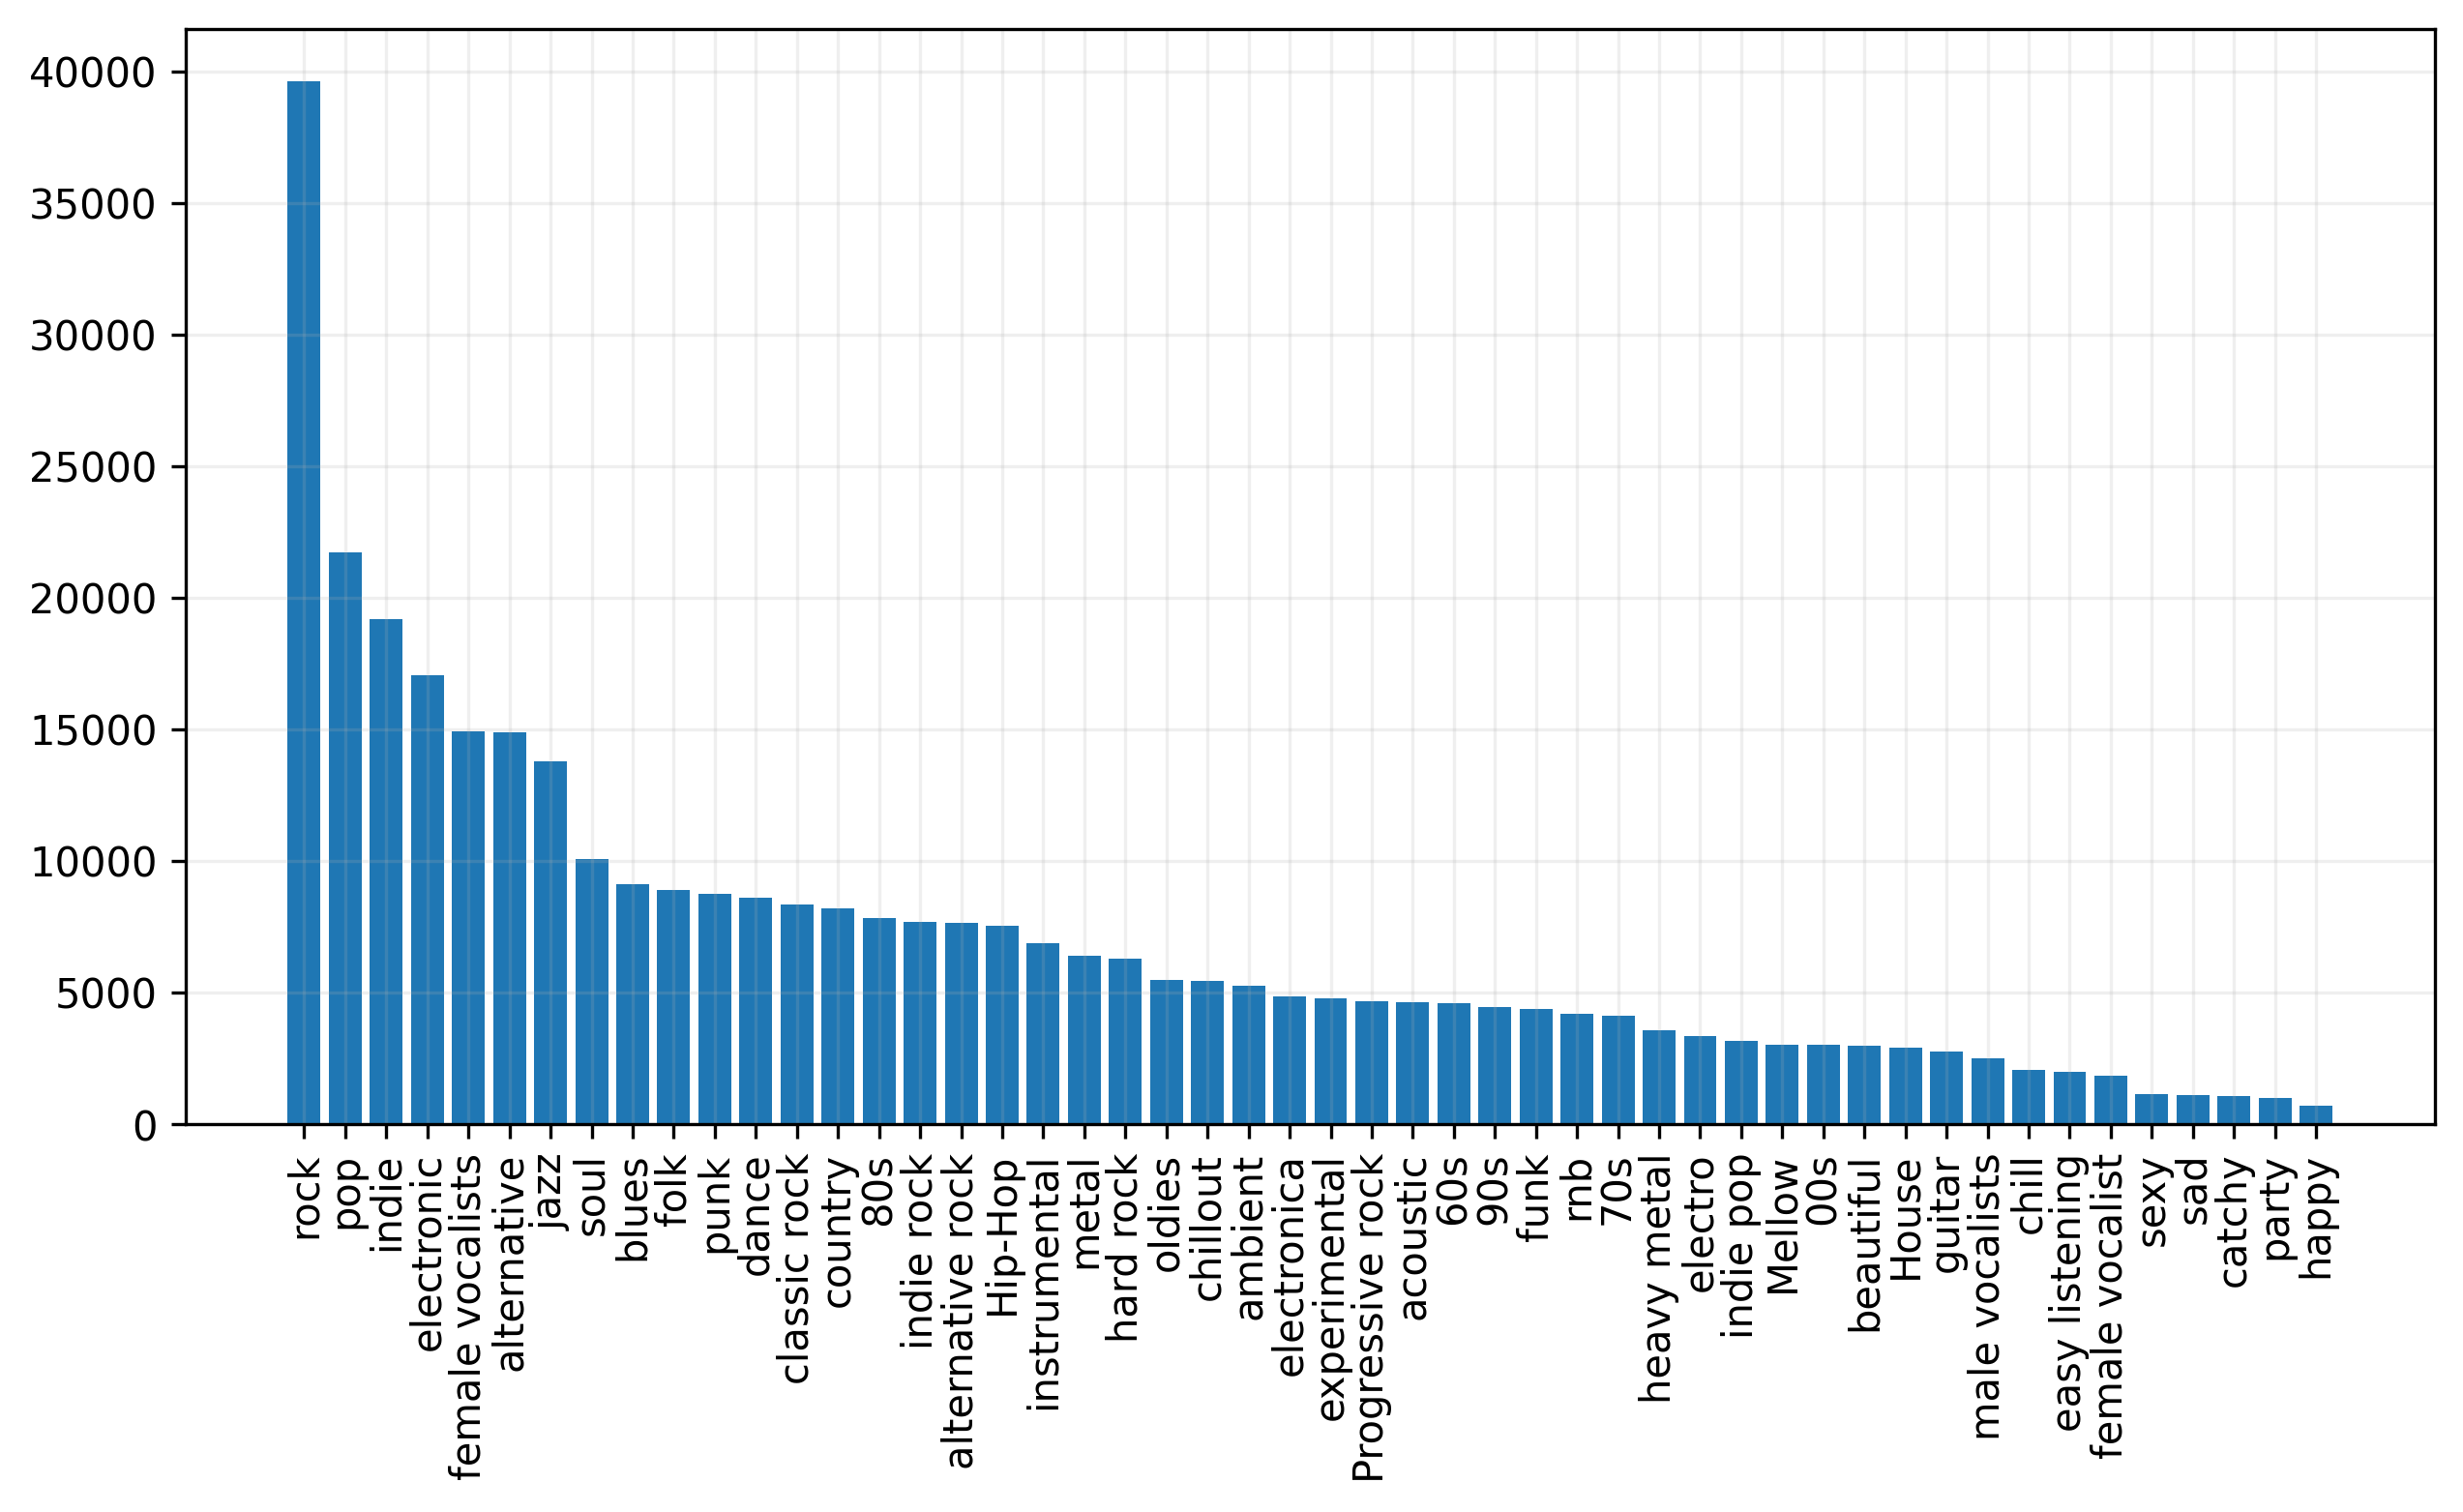

In [113]:
import numpy as np
import matplotlib.pyplot as plt


new_counter = {}
for k, v in counter.items():
    tag_name = train_dataset.tags[k]
    new_counter[tag_name] = v

new_counter = {k: v for k, v in sorted(new_counter.items(), key=lambda item: item[1], reverse=True)}
fig, ax = plt.subplots(figsize=(10,5), dpi=300)
plt.xticks(rotation=90)
plt.bar(new_counter.keys(), new_counter.values())
plt.grid(alpha=0.2)
plt.show()